In [2]:
import os 
import glob
import json
import matplotlib.pyplot as plt

In [3]:
source_global = os.path.join("/home","jofrony","Dropbox","Admin", "Current","bgmod","models","optim","HBP-2021Q4")
nucleus = "striatum"
tmp= dict(dspn=list(),ispn=list())
tmp2= dict(dspn=list(),ispn=list())
for source in glob.glob(os.path.join(source_global,"*")):
    name = os.path.basename(source).split("-")[1]
    print(name)
    
    with open(os.path.join(source, "val_models.json")) as f:
        b = json.load(f)
    
    vrheo = list()
    for k in b:
        diff = k["iv_curve"]["volt"][-1] - k["iv_curve"]["volt"][-2]
        i_diff = k["iv_curve"]["stim"][-1] - k["iv_curve"]["stim"][-2]
        
        average = (k["id_curve"]["stim"][0] - k["iv_curve"]["stim"][-1])/2 
 
        actual_rheo = k["iv_curve"]["volt"][-1] + diff*average/i_diff
        vrheo.append(actual_rheo)
        
    tmp[name] = tmp[name] + [k["iv_curve"]["volt"][-1]for k in b]
    tmp2[name] = tmp2[name] + vrheo

dspn
dspn
ispn
dspn
dspn
ispn
ispn
ispn


(array([ 4.,  5.,  6., 18., 58., 26., 13.,  2.,  7.,  5.]),
 array([-72.03269738, -69.85613231, -67.67956724, -65.50300218,
        -63.32643711, -61.14987204, -58.97330698, -56.79674191,
        -54.62017684, -52.44361178, -50.26704671]),
 <BarContainer object of 10 artists>)

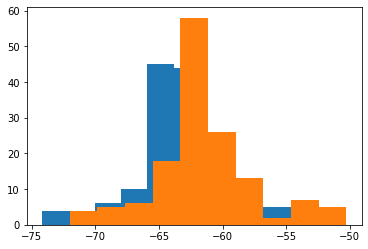

In [4]:
plt.hist(tmp["dspn"])
plt.hist(tmp2["dspn"])

(array([ 2., 39., 21., 24., 30., 26., 23., 10.,  4.,  3.]),
 array([-67.29099725, -65.71909791, -64.14719857, -62.57529924,
        -61.0033999 , -59.43150056, -57.85960123, -56.28770189,
        -54.71580256, -53.14390322, -51.57200388]),
 <BarContainer object of 10 artists>)

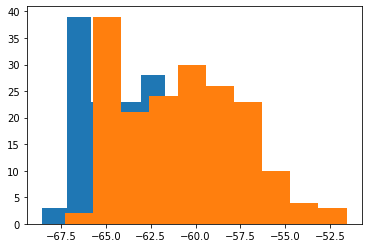

In [5]:
plt.hist(tmp["ispn"])
plt.hist(tmp2["ispn"])

In [23]:
import sys
import os
import glob
import json
sys.path.append("/home/jofrony/Documents/Repositories/BasalGangliaData/")
bgd = "/home/jofrony/Documents/Repositories/BasalGangliaData/data/neurons/striatum"
source_global = "/home/jofrony/Dropbox/Models/Microcircuit/HBP-2022Q2/*"
duration = 2

In [24]:
for source in glob.glob(source_global):
    print(source)
    basename = os.path.basename(source)
    if "dspn" in basename:
        neuron_type = "dspn"
    elif "ispn" in basename:
        neuron_type = "ispn"
    meta = json.load(open(os.path.join(bgd,neuron_type, basename, "meta.json")))
    var_model = json.load(open(os.path.join(source, "var_models.json")))
    val_model = json.load(open(os.path.join(source, "val_models.json")))
    morph_dict = json.load(open(os.path.join(bgd,neuron_type, basename, "morphology", "morphology_hash_filename.json")))
    parameter_dict = json.load(open(os.path.join(bgd,neuron_type, basename, "temp", "parameters_hash_id.json")))
    
    inv_map_parameter = {v: k for k, v in parameter_dict.items()}
    inv_map_morph = {v: k for k, v in morph_dict.items()}
    
    temp = dict()
    
    for v in val_model:
        
        
        for vr in var_model:
            
            if v["morph"] == vr["morph"] and v["par"] == vr["par"]:
                m = inv_map_morph[v["morph"]]
                p = inv_map_parameter[v["par"]]
                stimulation = vr['stim']
                tmp_stim = dict(sp_stim=list(),v_stim=list())
                tmp = dict(frequency=list(),voltage=list())
                for i, r in enumerate(vr["feat"]):
                    
                    if r["Spikecount"][0] > 0:
                        tmp_stim['sp_stim'].append(stimulation[i] * 1e-12)
                        tmp["frequency"].append(r["Spikecount"][0] / duration)
                    
                    if "steady_state_voltage_stimend" in r:
                        tmp_stim['v_stim'].append(stimulation[i] * 1e-12)
                        tmp["voltage"].append(r["steady_state_voltage_stimend"][0])
     
                if p in temp.keys():
                    d = {"spikes": dict(current=tmp_stim["sp_stim"], frequency=tmp["frequency"]),
                        "voltage": dict(current=tmp_stim["v_stim"],voltage=tmp["voltage"])}
                    temp[p].update({m : d})
                else:
                    d = {"spikes": dict(current=tmp_stim["sp_stim"], frequency=tmp["frequency"]),
                        "voltage": dict(current=tmp_stim["v_stim"],voltage=tmp["voltage"])}
                    temp.update({p : {m : d}})
            
    os.makedirs(os.path.join("temp", neuron_type, basename), exist_ok=True)
    
    with open(os.path.join("temp", neuron_type, basename, "if_info.json"), "w") as f:
        json.dump(temp, f, indent=4, sort_keys=True)

In [25]:
threshold=dict(dspn=list(),ispn=list())
threshold_v=dict(dspn=list(),ispn=list())
tmp_path = os.path.join("temp")
tmp= dict(dspn=list(),ispn=list())
for g in glob.glob(os.path.join(tmp_path, "*")):
    for f in glob.glob(os.path.join(g, "*")):
        name = os.path.basename(f).split("-")[1]
        print(name)

        with open(os.path.join(f, "if_info.json")) as f:
            d = json.load(f)
        
        rheos = list()
        for p in d:
            for m in d[p]:
                v = d[p][m]["voltage"]["voltage"][-1]
                rheos.append(v)
                
                if v > -60:
                    threshold[name].append([p,m])
                    threshold_v[name].append(v)
                
        tmp[name] = tmp[name] + rheos
        

dspn
dspn
dspn
dspn
ispn
ispn
ispn
ispn


(array([3., 2., 2., 2., 2., 1., 1., 1., 1., 3.]),
 array([-59.95629226, -59.30946619, -58.66264012, -58.01581405,
        -57.36898797, -56.7221619 , -56.07533583, -55.42850976,
        -54.78168368, -54.13485761, -53.48803154]),
 <BarContainer object of 10 artists>)

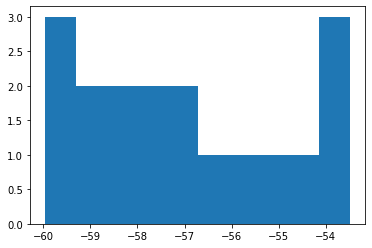

In [26]:
plt.hist(threshold_v["dspn"])

(array([8., 8., 8., 3., 0., 4., 1., 1., 0., 2.]),
 array([-59.95033174, -59.4360672 , -58.92180265, -58.40753811,
        -57.89327357, -57.37900903, -56.86474449, -56.35047995,
        -55.8362154 , -55.32195086, -54.80768632]),
 <BarContainer object of 10 artists>)

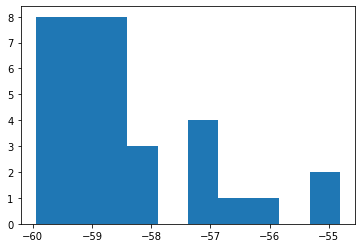

In [27]:
plt.hist(threshold_v["ispn"])

In [22]:
with open("/home/jofrony/Documents/Repositories/current_bgd2/threshold/local/networks/striatum/above_threshold.json", "w") as f:
    json.dump(threshold, f)

(array([ 4.,  4.,  6., 10., 45., 44., 15.,  6.,  5.,  5.]),
 array([-74.19161386, -72.12125563, -70.0508974 , -67.98053917,
        -65.91018093, -63.8398227 , -61.76946447, -59.69910624,
        -57.628748  , -55.55838977, -53.48803154]),
 <BarContainer object of 10 artists>)

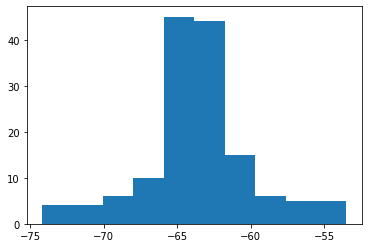

In [48]:
plt.hist(tmp["dspn"])
#plt.hist(tmp2["dspn"])

(array([ 3., 39., 23., 23., 28., 22., 25., 11.,  5.,  3.]),
 array([-68.56175552, -67.1863486 , -65.81094168, -64.43553476,
        -63.06012784, -61.68472092, -60.309314  , -58.93390708,
        -57.55850016, -56.18309324, -54.80768632]),
 <BarContainer object of 10 artists>)

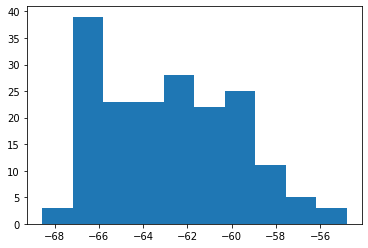

In [50]:
plt.hist(tmp["ispn"])
#plt.hist(tmp2["ispn"])